# Practica calificada 5

## Ejercicio 1

You will make two maps:
1. Plot your country as the background. Use **cx** to plot some **points** (the cities, airports, etc.) below the centroid.
2. Plot your country as the background. Select with **cx** all the first administrative divisions above the centroid. Then, use clip to show some **lines** (rivers, railroads, etc) that cross those divisions.

### Parte 1

In [3]:
linkWorldMap="https://github.com/CRVCh-16/PC5/raw/refs/heads/main/canadaMaps_ESRI_102001.gpkg"
!pip install fiona

In [4]:
import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['country',
 'cities',
 'rivers',
 'centroid',
 'airports',
 'border',
 'country_GADM',
 'provincias_GADM',
 'municipios_GADM',
 'menor_GADM',
 'indicators']

In [5]:
import os

In [6]:
countryCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='country')

In [7]:
citiesCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='cities')


In [8]:
riversCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='rivers')


In [9]:
centroidCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='centroid')


In [10]:
airportsCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='airports')


In [11]:
borderCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='border')


In [12]:
country_GADMCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='country_GADM')


In [13]:
provincias_GADMCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='provincias_GADM')


In [14]:
municipios_GADMCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='municipios_GADM')


In [15]:
menor_GADMCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='menor_GADM')

In [16]:
indicatorsCanada=gpd.read_file(os.path.join("canadaMaps_ESRI_102001.gpkg"),layer='indicators')

In [17]:
worldMapsLink="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

In [18]:
countries=gpd.read_file(worldMapsLink,layer='countries')
rivers=gpd.read_file(worldMapsLink,layer='rivers')
cities=gpd.read_file(worldMapsLink,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

In [19]:
canada=countries[countries.COUNTRY=='Canada']

In [20]:
citiesCanada_clipped = gpd.clip(gdf=cities, mask=canada)
riversCanada_clipped = gpd.clip(gdf=rivers, mask=canada)

In [21]:
canada_102001=canada.to_crs("ESRI:102001")
cities_102001=citiesCanada_clipped.to_crs("ESRI:102001")
rivers_102001=riversCanada_clipped.to_crs("ESRI:102001")

In [22]:
canada_102001.centroid

35    POINT (-24206.312 2263307.35)
dtype: geometry

In [23]:
xCoordCentroid=canada_102001.centroid.iloc[0].x
xCoordCentroid

-24206.31186623601

In [24]:
yCoordCentroid=canada_102001.centroid.iloc[0].y
yCoordCentroid

2263307.349641779

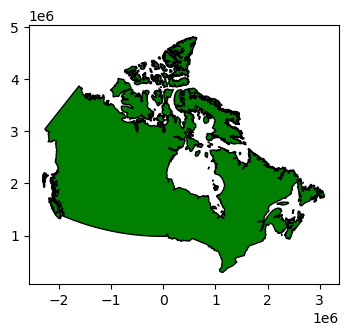

In [25]:
canadaBase=canada_102001.plot(facecolor="green",edgecolor="black",figsize=(4,4))

In [26]:
citiesBelowCentroid=cities_102001.cx[:,:yCoordCentroid]

<Axes: >

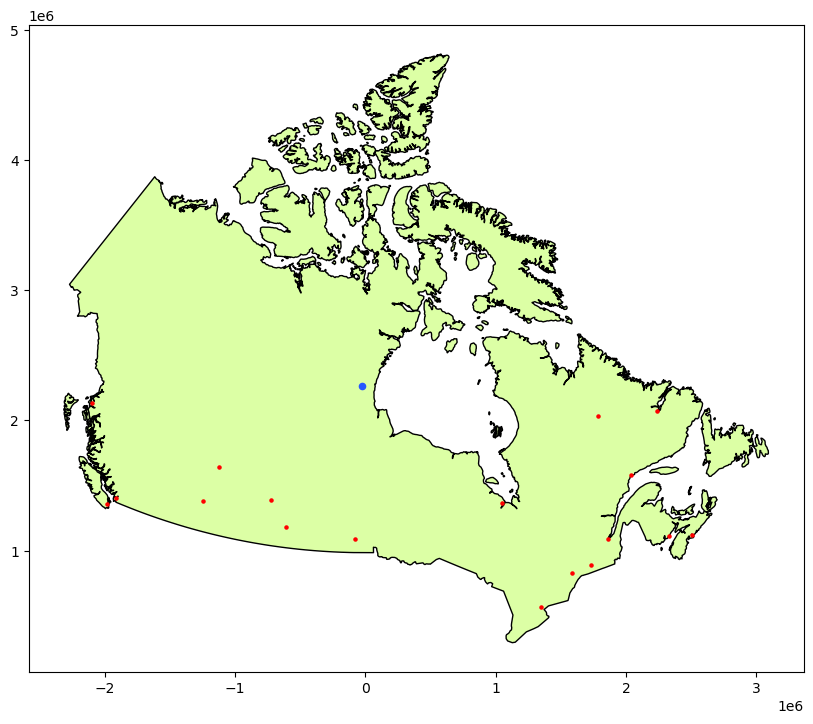

In [27]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,10))

canadaBase=canada_102001.plot(facecolor="#dcffa5",edgecolor="black",ax=ax1)
citiesBelowCentroid.plot(color="red",markersize=5,ax=canadaBase)
canada_102001.centroid.plot(color="#2657ff",markersize=20,ax=canadaBase)

### Parte 2

<Axes: >

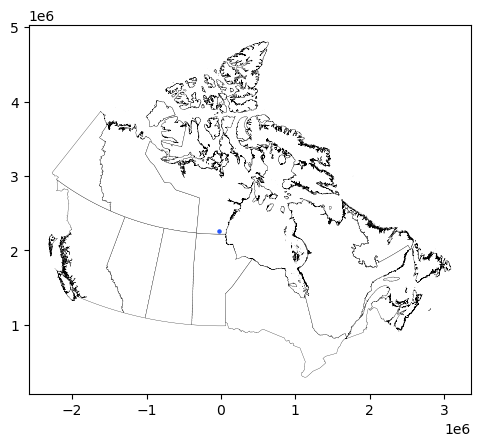

In [28]:
 # provincias_GADMCanada.plot(facecolor="white",edgecolor="black")
canada_102001.centroid.plot(color="#2657ff",markersize=5,ax=provincias_GADMCanada.plot(facecolor="white",edgecolor="black",linewidth=0.2)  )

In [29]:
provinciasAboveCentroid=provincias_GADMCanada.cx[:,yCoordCentroid:]

In [30]:
riversCanadaAboveCentroid_clipped = gpd.clip(gdf=riversCanada_clipped.to_crs("ESRI:102001"), mask=provinciasAboveCentroid)

<Axes: >

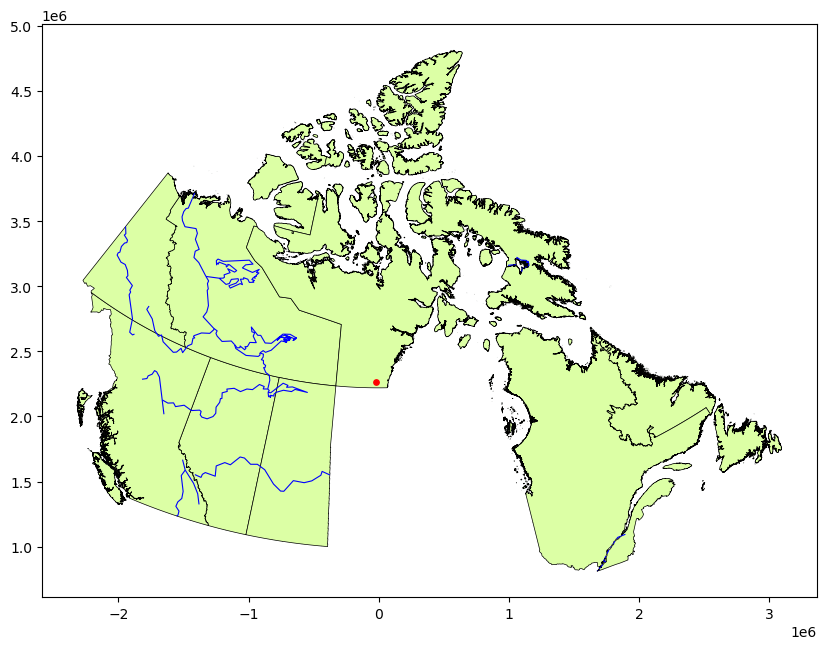

In [31]:
base0=provincias_GADMCanada.cx[:,yCoordCentroid:].plot(facecolor="#dcffa5",edgecolor="black",linewidth=0.5,figsize=(10,10))

canada_102001.centroid.plot(color="red",markersize=15,ax=base0)
riversCanadaAboveCentroid_clipped.plot(edgecolor="blue",ax=base0,linewidth=0.8)

**Provincias enteramente sobre el centroide**

In [32]:
ProvN_canada=provincias_GADMCanada.cx[:,yCoordCentroid:]
ProvS_canada=provincias_GADMCanada.cx[:,:yCoordCentroid]
ProvNS_canada=ProvN_canada.overlay(ProvS_canada, how="intersection",keep_geom_type=True)
provAboveCentroidNEW=provincias_GADMCanada.cx[:,yCoordCentroid:].overlay(ProvNS_canada, how='difference',keep_geom_type=True)
riversCanadaAboveCentroidNEW_clipped = gpd.clip(gdf=riversCanada_clipped.to_crs("ESRI:102001"), mask=provAboveCentroidNEW)

<Axes: >

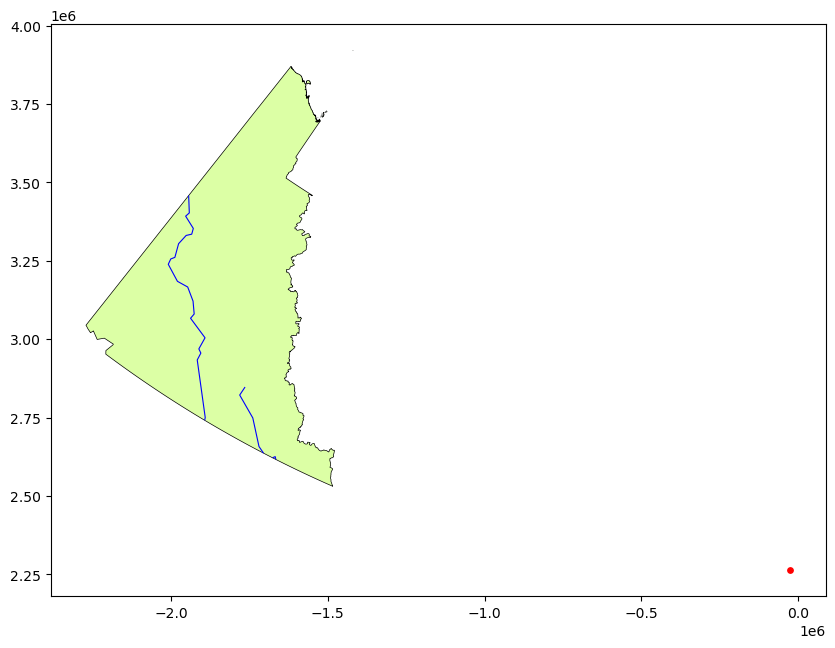

In [33]:
base10=provAboveCentroidNEW.plot(facecolor="#dcffa5",edgecolor="black",linewidth=0.5,figsize=(10,10))

canada_102001.centroid.plot(color="red",markersize=15,ax=base10)
riversCanadaAboveCentroidNEW_clipped.plot(edgecolor="blue",ax=base10,linewidth=0.8)

## Ejercicio 2

1. Create some subset of polygons with your country data at the municipal (or similar level). Use Unary UNION with those  polygons, and create a geoDF with the result.
2. Dissolve your municipalities by another higher level administrative level. Plot the result.
3. If possible, color some areas of your country by aggregating; if not, plot the "median" values in the _indicators_ map.

### Parte 1

In [34]:
# 1 haacer regiones a partir de distritos
# 2, pero con dissolve
# 3, hacer el dissolve con aggregate

<Axes: >

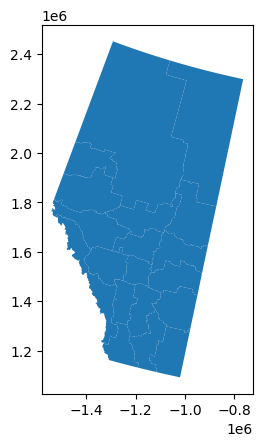

In [35]:
municipios_GADMCanada[municipios_GADMCanada.NAME_1=='Alberta'].plot()

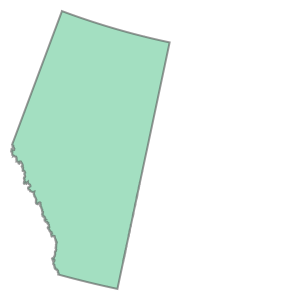

In [36]:
municipios_GADMCanada[municipios_GADMCanada.NAME_1=='Alberta'].union_all()

In [37]:
alberta_union=municipios_GADMCanada[municipios_GADMCanada.NAME_1=='Alberta'].union_all()

In [38]:
gpd.GeoDataFrame(index=[0],data={'ADM':'Alberta'}, crs=municipios_GADMCanada.crs, geometry=[alberta_union])

,ADM,geometry
0,Alberta,"POLYGON ((-1191696.513 1131094.24, -1193580.69..."


### Parte 2

In [39]:
alberta_dissolve=municipios_GADMCanada[municipios_GADMCanada.NAME_1=='Alberta'].dissolve()

In [40]:
alberta_dissolve

,geometry,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
0,"POLYGON ((-1191696.513 1131094.24, -1193580.69...",CAN.1.11_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 1,NA,NA,Census Division,Census Division,01,CA.AB.ON


In [41]:
alberta_dissolve.drop(columns=['GID_2','NAME_2','VARNAME_2','NL_NAME_2','TYPE_2','ENGTYPE_2','CC_2','HASC_2'],inplace=True)
alberta_dissolve

,geometry,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1
0,"POLYGON ((-1191696.513 1131094.24, -1193580.69...",CAN,Canada,CAN.1_1,Alberta,NA


In [42]:
municipios_GADMCanada.head(3)

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,CAN.1.11_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 1,NA,NA,Census Division,Census Division,01,CA.AB.ON,"MULTIPOLYGON (((-1072474.656 1102938.917, -107..."
1,CAN.1.1_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 10,NA,NA,Census Division,Census Division,10,CA.AB.TE,"MULTIPOLYGON (((-1077505.317 1564290.622, -107..."
2,CAN.1.2_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 11,NA,NA,Census Division,Census Division,11,CA.AB.EL,"MULTIPOLYGON (((-1129359.754 1589249.184, -112..."


<Axes: >

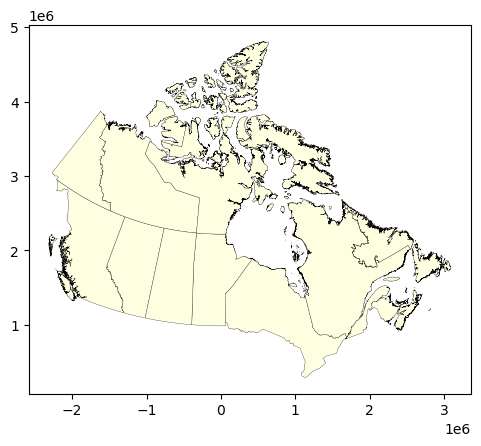

In [43]:
municipios_GADMCanada.dissolve(by='NAME_1').plot(facecolor='#feffe0', edgecolor='black',linewidth=0.2) # disuelve por la columna NAME_1

In [44]:
canada_name1_diss=municipios_GADMCanada.dissolve(by='NAME_1')

### Parte 3

In [45]:
indicatorsCanada.head(3)

,COUNTRY,Officialstatename,InternetccTLD,iso2,iso3,fragility,co2,region,ForestRev_gdp,fragility_Qt,...,forestRev_gdp_Qt,co2_Qt_jc5,co2_Qt_jc5_cat,forestRev_gdp_Qt_jc5,forestRev_gdp_Qt_jc5_cat,Energy_consumption_per_capita_BtuPerPerson,energy_Qt,energy_Qt_jc5,energy_Qt_jc5_cat,geometry
0,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,54.4,729000.0,CENTRAL AMERICA AND THE CARIBBEAN,0.0,-0.559624,...,-5.199338,0,0_Great,0,0_Great,110114000,0.859799,3,3_Bad,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
1,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,105.0,7893000.0,SOUTH ASIA,0.2,1.824703,...,-0.076809,2,2_Middle,2,2_Middle,3380000,-1.279661,0,0_Great,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,75.4,151633000.0,AFRICA,0.1,0.281088,...,-0.338888,3,3_Bad,1,1_Good,61843000,0.230568,2,2_Middle,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."


In [46]:
indicatorsByRegion=indicatorsCanada.dissolve(
     by="region",
     aggfunc={
         "COUNTRY": "count",
         "fragility": ["median"],
         "co2": ["median"],
         "ForestRev_gdp": ["median"]
     },as_index=False,
 )

In [47]:
indicatorsByRegion

,region,geometry,"(COUNTRY, count)","(fragility, median)","(co2, median)","(ForestRev_gdp, median)"
0,AFRICA,"MULTIPOLYGON (((-2.92813 5.10022, -2.93222 5.1...",50,87.10,4331000.0,2.360
1,AUSTRALIA AND OCEANIA,"MULTIPOLYGON (((-176.51779 -43.90778, -176.532...",6,64.20,1023000.0,0.385
2,CENTRAL AMERICA AND THE CARIBBEAN,"MULTIPOLYGON (((-81.71556 7.44681, -81.71362 7...",15,61.20,7632000.0,0.150
3,CENTRAL ASIA,"MULTIPOLYGON (((50.03472 45.04833, 50.0425 45....",6,75.20,106001000.0,0.005
4,EAST AND SOUTHEAST ASIA,"MULTIPOLYGON (((105.26361 -6.54472, 105.26138 ...",14,68.25,244456000.0,0.260
5,EUROPE,"MULTIPOLYGON (((-18.13223 27.77264, -18.1132 2...",36,40.75,40367500.0,0.140
6,MIDDLE EAST,"MULTIPOLYGON (((42.76819 14.06653, 42.7868 14....",16,72.60,68706500.0,0.000
7,NORTH AMERICA,"MULTIPOLYGON (((-155.211 20.00166, -155.18335 ...",3,38.00,612084000.0,0.080
8,SOUTH AMERICA,"MULTIPOLYGON (((-74.93431 -51.85501, -74.93251...",11,68.20,36051000.0,0.490
9,SOUTH ASIA,"MULTIPOLYGON (((73.10193 -0.58431, 73.09915 -0...",8,84.35,15916000.0,0.120


In [48]:
!pip install mapclassify

<Axes: >

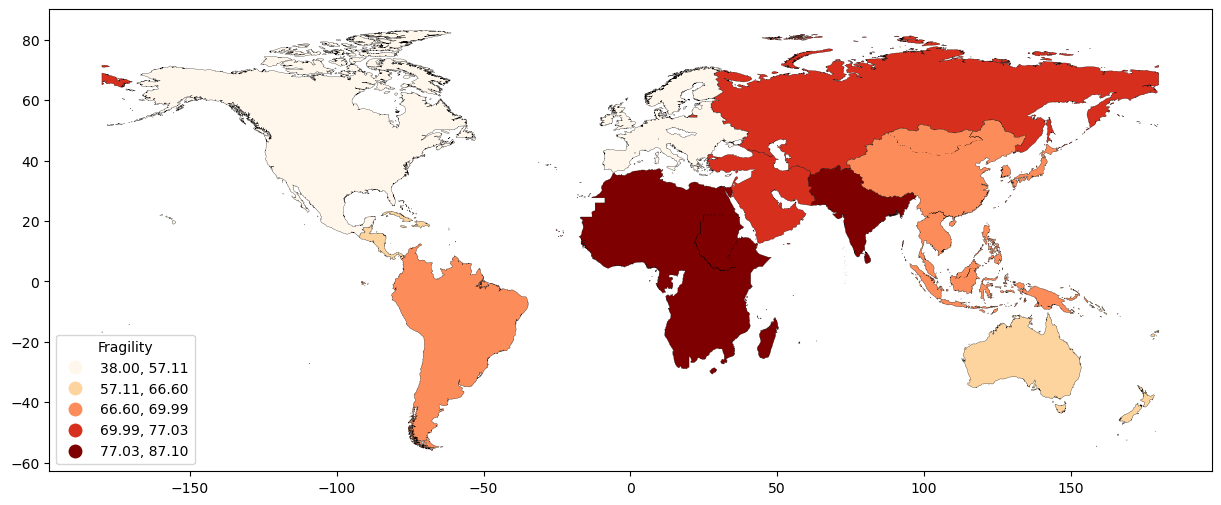

In [49]:
indicatorsByRegion.plot(column =('fragility', 'median'),scheme='quantiles', cmap='OrRd',
                        legend=True,
                        legend_kwds={"title": "Fragility",'loc': 'lower left'},
                        edgecolor='black',linewidth=0.2,
                        figsize=(15, 10))

## Ejercicio 3

1. Select some points from your maps.
2. Create the convex hull for those points.    
3. Turn the hull into a GDF.    
4. Plot the hull on top of the country.

### Parte 1

In [50]:
airportsCanada.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Lac-des-Loups Airport,closed,46.982201,-76.482498,NaN,Quebec,Lac-des-Loups,POINT (1475490.966 977440.662)
1,Pourvoirie Joncas Airstrip,small_airport,47.105400,-77.631104,NaN,Quebec,Saint-Lazare,POINT (1387233.147 966022.396)
2,RCAF Station Buttress,closed,50.236099,-105.547997,NaN,Saskatchewan,Moose Jaw,POINT (-678527.039 1170461.817)
3,RCAF Station Aylmer,closed,42.805901,-80.944199,NaN,Ontario,Aylmer,POINT (1246453.428 444135.701)
4,RCAF Station Lincoln Park,closed,51.009399,-114.133003,NaN,Alberta,Calgary,POINT (-1254351.163 1378637.231)


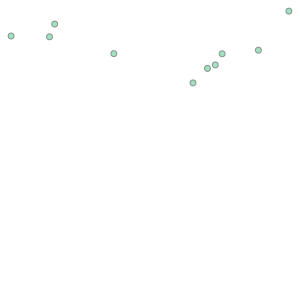

In [51]:
large_airport=airportsCanada[airportsCanada.kind=='large_airport']
large_airport.union_all()

### Parte 2

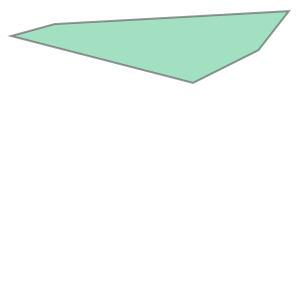

In [52]:
large_airport.union_all().convex_hull

### Parte 3

In [53]:
LargeAirport_hull= gpd.GeoDataFrame(index=[0], crs=large_airport.crs, geometry=[large_airport.union_all().convex_hull])
LargeAirport_hull['name']='large airports hull'

LargeAirport_hull

,geometry,name
0,"POLYGON ((1330217.176 561723.572, -1931482.214...",large airports hull


### Parte 4

<Axes: >

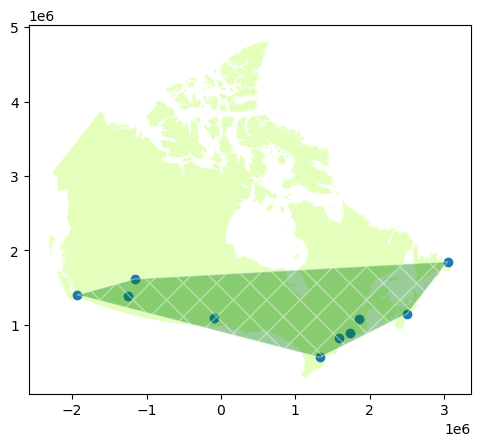

In [54]:
base1=countryCanada.plot(facecolor='#e3ffbb')
large_airport.plot(ax=base1)
LargeAirport_hull.plot(ax=base1,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

## Ejercicio 4

Apply two spatial overlays to your maps. If possible. If not, try the codes below.

### Intersection

<Axes: >

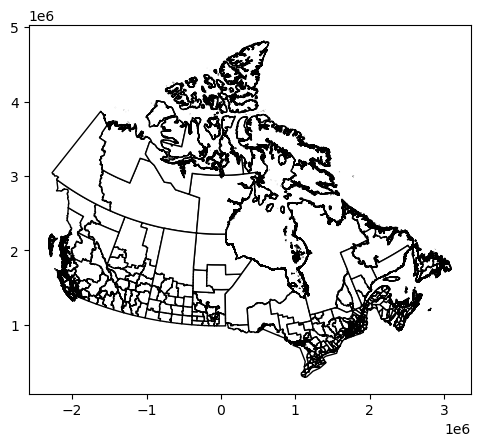

In [55]:
municipios_GADMCanada.plot(facecolor="white",edgecolor="black")

In [56]:
# the north
MunisN_canada=municipios_GADMCanada.cx[:,yCoordCentroid:]
# the south
MunisS_canada=municipios_GADMCanada.cx[:,:yCoordCentroid]
# the west
MunisW_canada=municipios_GADMCanada.cx[:xCoordCentroid,:]
# the east
MunisE_canada=municipios_GADMCanada.cx[xCoordCentroid:,:]

<Axes: >

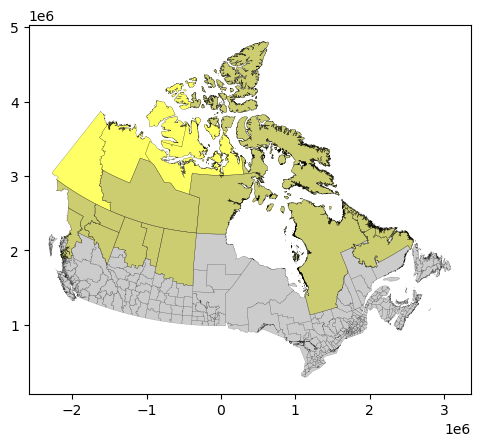

In [57]:
base2=MunisN_canada.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisS_canada.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base2, alpha=0.4)

<Axes: >

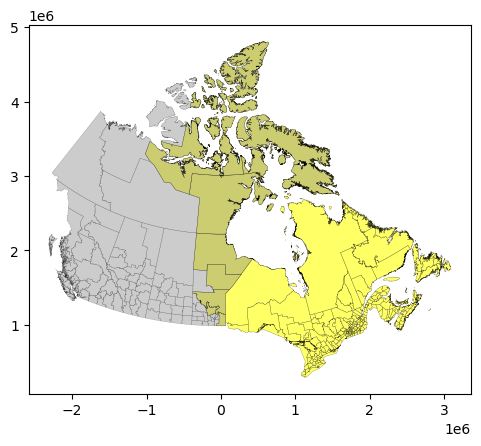

In [58]:
base3=MunisE_canada.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisW_canada.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base3, alpha=0.4)

<Axes: >

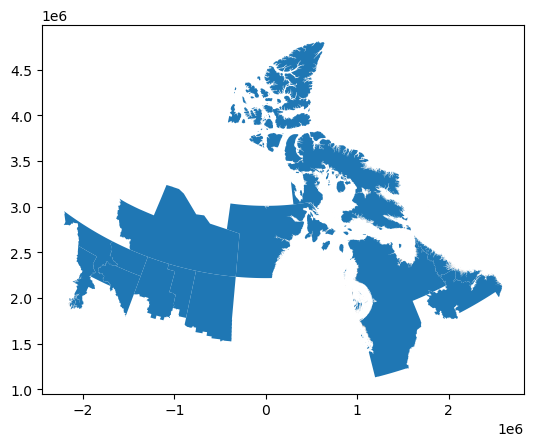

In [59]:
MunisNS_canada=MunisN_canada.overlay(MunisS_canada, how="intersection",keep_geom_type=True)
MunisNS_canada.plot()

<Axes: >

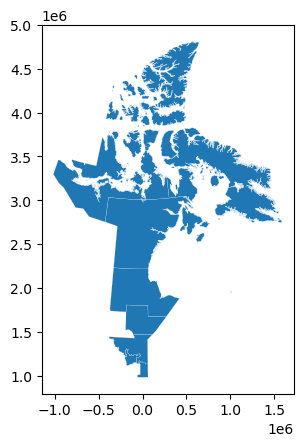

In [60]:
# keeping the overlay
MunisWE_canada=MunisW_canada.overlay(MunisE_canada, how="intersection",keep_geom_type=True)
MunisWE_canada.plot(edgecolor='white',linewidth=0.1)

### Union

In [61]:
MunisNS_canada.columns

Index(['GID_2_1', 'GID_0_1', 'COUNTRY_1', 'GID_1_1', 'NAME_1_1', 'NL_NAME_1_1',
       'NAME_2_1', 'VARNAME_2_1', 'NL_NAME_2_1', 'TYPE_2_1', 'ENGTYPE_2_1',
       'CC_2_1', 'HASC_2_1', 'GID_2_2', 'GID_0_2', 'COUNTRY_2', 'GID_1_2',
       'NAME_1_2', 'NL_NAME_1_2', 'NAME_2_2', 'VARNAME_2_2', 'NL_NAME_2_2',
       'TYPE_2_2', 'ENGTYPE_2_2', 'CC_2_2', 'HASC_2_2', 'geometry'],
      dtype='object')

In [62]:
MunisWE_canada.columns

Index(['GID_2_1', 'GID_0_1', 'COUNTRY_1', 'GID_1_1', 'NAME_1_1', 'NL_NAME_1_1',
       'NAME_2_1', 'VARNAME_2_1', 'NL_NAME_2_1', 'TYPE_2_1', 'ENGTYPE_2_1',
       'CC_2_1', 'HASC_2_1', 'GID_2_2', 'GID_0_2', 'COUNTRY_2', 'GID_1_2',
       'NAME_1_2', 'NL_NAME_1_2', 'NAME_2_2', 'VARNAME_2_2', 'NL_NAME_2_2',
       'TYPE_2_2', 'ENGTYPE_2_2', 'CC_2_2', 'HASC_2_2', 'geometry'],
      dtype='object')

In [63]:
MunisNS_canada.head()

,GID_2_1,GID_0_1,COUNTRY_1,GID_1_1,NAME_1_1,NL_NAME_1_1,NAME_2_1,VARNAME_2_1,NL_NAME_2_1,TYPE_2_1,...,NAME_1_2,NL_NAME_1_2,NAME_2_2,VARNAME_2_2,NL_NAME_2_2,TYPE_2_2,ENGTYPE_2_2,CC_2_2,HASC_2_2,geometry
0,CAN.1.7_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 16,NA,NA,Census Division,...,Alberta,NA,Division No. 16,NA,NA,Census Division,Census Division,16,CA.AB.ST,"POLYGON ((-876147.827 1784440.101, -878663.163..."
1,CAN.1.8_1,CAN,Canada,CAN.1_1,Alberta,NA,Division No. 17,NA,NA,Census Division,...,Alberta,NA,Division No. 17,NA,NA,Census Division,Census Division,17,CA.AB.SN,"POLYGON ((-1089738.295 1789849.461, -1089762.4..."
2,CAN.2.15_1,CAN,Canada,CAN.2_1,British Columbia,NA,Kitimat-Stikine,NA,NA,Regional District,...,British Columbia,NA,Kitimat-Stikine,NA,NA,Regional District,Regional District,49,CA.BC.KS,"MULTIPOLYGON (((-2129845.346 1898535.118, -212..."
3,CAN.2.20_1,CAN,Canada,CAN.2_1,British Columbia,NA,Northern Rockies,NA,NA,Regional District,...,British Columbia,NA,Northern Rockies,NA,NA,Regional District,Regional District,59,CA.BC.NR,"POLYGON ((-1294939.496 2443124.579, -1295425.2..."
4,CAN.2.22_1,CAN,Canada,CAN.2_1,British Columbia,NA,Peace River,NA,NA,Regional District,...,British Columbia,NA,Peace River,NA,NA,Regional District,Regional District,55,CA.BC.PC,"POLYGON ((-1531754.065 1808723.434, -1531947.1..."


In [64]:
keep=['COUNTRY_1','NAME_1_1','NAME_2_1','geometry']
MunisNS_canada=MunisNS_canada.loc[:,keep]
MunisWE_canada=MunisWE_canada.loc[:,keep]

In [65]:
# now
MunisNS_canada.overlay(MunisWE_canada,how="union",keep_geom_type=True)

,COUNTRY_1_1,NAME_1_1_1,NAME_2_1_1,COUNTRY_1_2,NAME_1_1_2,NAME_2_1_2,geometry
0,Canada,Nunavut,Baffin,Canada,Nunavut,Baffin,"MULTIPOLYGON (((1009456.723 1957149.413, 10094..."
1,Canada,Nunavut,Keewatin,Canada,Nunavut,Keewatin,"MULTIPOLYGON (((66147.242 2222412.329, 66059.8..."
2,Canada,Alberta,Division No. 16,NaN,NaN,NaN,"POLYGON ((-876147.827 1784440.101, -878663.163..."
3,Canada,Alberta,Division No. 17,NaN,NaN,NaN,"POLYGON ((-1089738.295 1789849.461, -1089762.4..."
4,Canada,British Columbia,Kitimat-Stikine,NaN,NaN,NaN,"MULTIPOLYGON (((-2129845.346 1898535.118, -212..."
5,Canada,British Columbia,Northern Rockies,NaN,NaN,NaN,"POLYGON ((-1294939.496 2443124.579, -1295425.2..."
6,Canada,British Columbia,Peace River,NaN,NaN,NaN,"POLYGON ((-1531754.065 1808723.434, -1531947.1..."
7,Canada,British Columbia,Stikine,NaN,NaN,NaN,"POLYGON ((-1709497.208 2136717.838, -1710803.5..."
8,Canada,Newfoundland and Labrador,Division No. 10,NaN,NaN,NaN,"MULTIPOLYGON (((2587482.903 2129780.867, 25874..."
9,Canada,Newfoundland and Labrador,Division No. 11,NaN,NaN,NaN,"MULTIPOLYGON (((2296029.442 2157856.905, 22959..."


<Axes: >

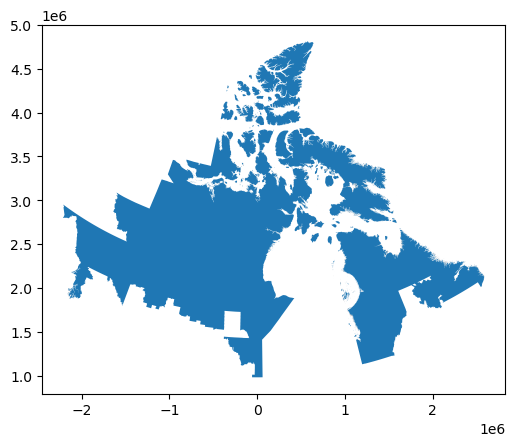

In [66]:
MunisNS_canada.overlay(MunisWE_canada,how="union",keep_geom_type=True).dissolve().plot()

In [67]:
muniMidCanada=MunisNS_canada.overlay(MunisWE_canada,how="union",keep_geom_type=True).dissolve()

In [68]:
muniMidCanada

,geometry,COUNTRY_1_1,NAME_1_1_1,NAME_2_1_1,COUNTRY_1_2,NAME_1_1_2,NAME_2_1_2
0,"MULTIPOLYGON (((-2135867.393 1877360.263, -213...",Canada,Nunavut,Baffin,Canada,Nunavut,Baffin


In [69]:
# some cleaning

muniMidCanada['zone']='middles'
muniMidCanada=muniMidCanada.loc[:,['COUNTRY_1_1','zone','geometry']]
muniMidCanada

,COUNTRY_1_1,zone,geometry
0,Canada,middles,"MULTIPOLYGON (((-2135867.393 1877360.263, -213..."
